In [1]:
import pandas as pd

df = pd.read_csv('malaria_final_version.csv')
df.head()

,Country Name,Year,Country Code,"Incidence of malaria (per 1,000 population at risk)",Malaria cases reported,Rural population (% of total population),Rural population growth (annual %),Urban population (% of total population),Urban population growth (annual %),People using at least basic drinking water services (% of population),"People using at least basic drinking water services, rural (% of rural population)","People using at least basic drinking water services, urban (% of urban population)",People using at least basic sanitation services (% of population),"People using at least basic sanitation services, rural (% of rural population)","People using at least basic sanitation services, urban (% of urban population)",latitude,longitude,geometry
0,Algeria,2007,DZA,0.01,26.0,34.65,-0.60,65.35,2.71,91.68,85.83,94.78,85.85,76.94,90.57,28.033886,1.659626,POINT (28.033886 1.659626)
1,Angola,2007,AGO,286.72,1533485.0,42.48,1.91,57.52,5.01,47.96,23.77,65.83,37.26,14.00,54.44,-11.202692,17.873887,POINT (-11.202692 17.873887)
2,Benin,2007,BEN,480.24,0.0,58.44,1.99,41.56,4.09,63.78,54.92,76.24,11.80,4.29,22.36,9.307690,2.315834,POINT (9.307689999999999 2.315834)
3,Botswana,2007,BWA,1.03,390.0,42.07,-1.44,57.93,4.80,78.89,57.60,94.35,61.60,39.99,77.30,-22.328474,24.684866,POINT (-22.328474 24.684866)
4,Burkina Faso,2007,BFA,503.80,44246.0,77.00,2.16,23.00,5.91,52.27,45.13,76.15,15.60,6.38,46.49,12.238333,-1.561593,POINT (12.238333 -1.561593)


In [2]:
df.columns

Index(['Country Name', 'Year', 'Country Code',
       'Incidence of malaria (per 1,000 population at risk)',
       'Malaria cases reported', 'Rural population (% of total population)',
       'Rural population growth (annual %)',
       'Urban population (% of total population)',
       'Urban population growth (annual %)',
       'People using at least basic drinking water services (% of population)',
       'People using at least basic drinking water services, rural (% of rural population)',
       'People using at least basic drinking water services, urban (% of urban population)',
       'People using at least basic sanitation services (% of population)',
       'People using at least basic sanitation services, rural (% of rural population)',
       'People using at least basic sanitation services, urban  (% of urban population)',
       'latitude', 'longitude', 'geometry'],
      dtype='object')

In [3]:
# Check for missing values
print(df.isnull().sum())

# Check for duplicates
print(df.duplicated().sum())


Country Name                                                                           0
Year                                                                                   0
Country Code                                                                           0
Incidence of malaria (per 1,000 population at risk)                                   44
Malaria cases reported                                                                44
Rural population (% of total population)                                               6
Rural population growth (annual %)                                                     6
Urban population (% of total population)                                               6
Urban population growth (annual %)                                                     6
People using at least basic drinking water services (% of population)                  6
People using at least basic drinking water services, rural (% of rural population)    28
People using at least

In [4]:
# Fill missing values in numerical columns with the median
missing_values_cols = ['Incidence of malaria (per 1,000 population at risk)',
       'Malaria cases reported', 'Rural population (% of total population)',
       'Rural population growth (annual %)',
       'Urban population (% of total population)',
       'Urban population growth (annual %)',
       'People using at least basic drinking water services (% of population)',
       'People using at least basic drinking water services, rural (% of rural population)',
       'People using at least basic drinking water services, urban (% of urban population)',
       'People using at least basic sanitation services (% of population)',
       'People using at least basic sanitation services, rural (% of rural population)',
       'People using at least basic sanitation services, urban  (% of urban population)',
       'latitude', 'longitude']
for col in missing_values_cols:
    df[col] = df[col].fillna(df[col].median())

# Drop rows with missing values in 'geometry' column
df.dropna(subset=['geometry'], inplace=True)

# Check for missing values again
print(df.isnull().sum())

Country Name                                                                          0
Year                                                                                  0
Country Code                                                                          0
Incidence of malaria (per 1,000 population at risk)                                   0
Malaria cases reported                                                                0
Rural population (% of total population)                                              0
Rural population growth (annual %)                                                    0
Urban population (% of total population)                                              0
Urban population growth (annual %)                                                    0
People using at least basic drinking water services (% of population)                 0
People using at least basic drinking water services, rural (% of rural population)    0
People using at least basic drin

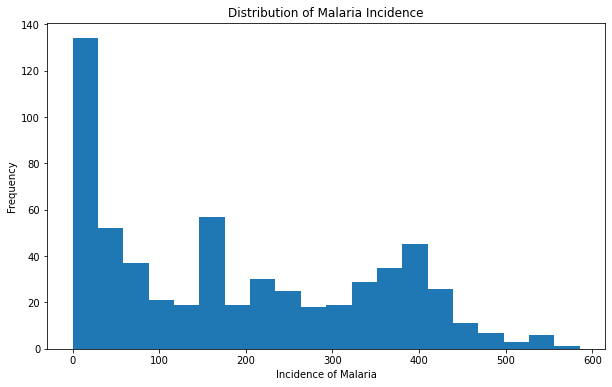

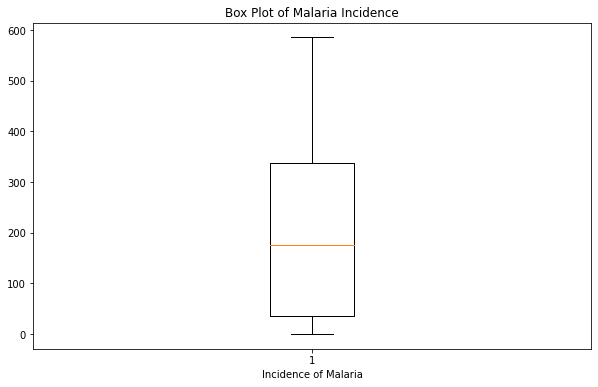

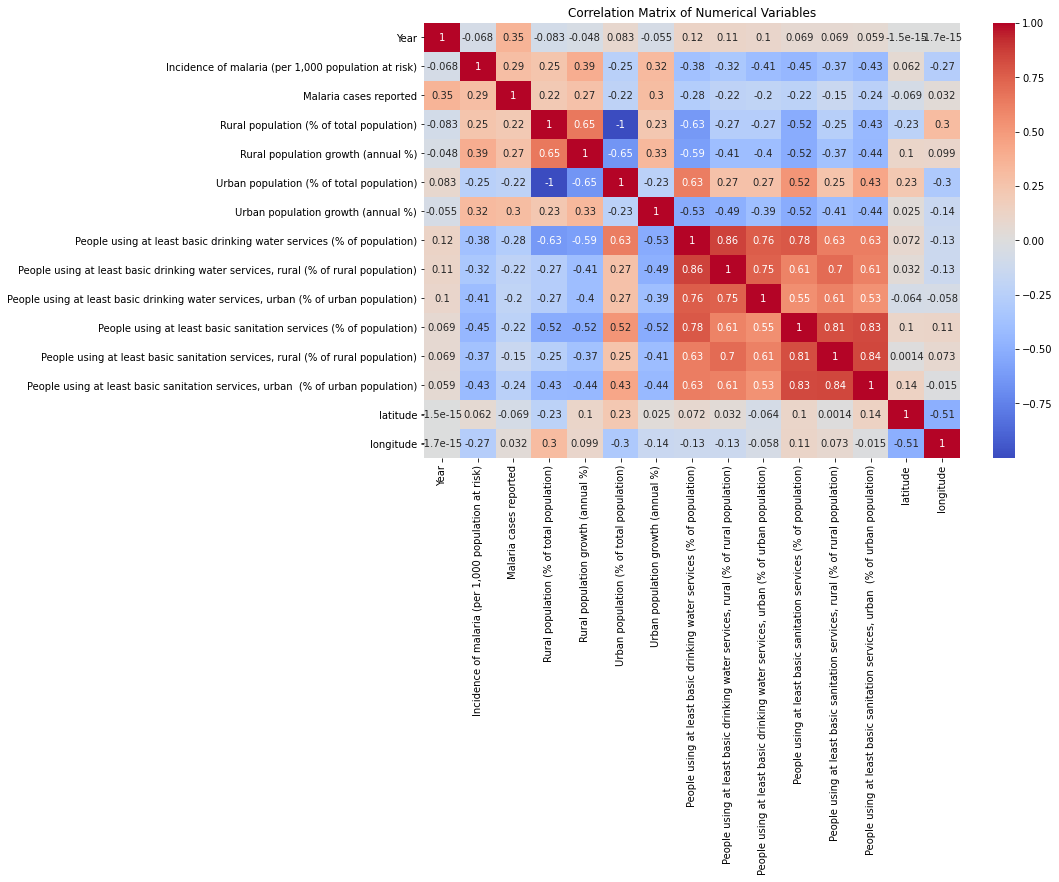

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Histograms
plt.figure(figsize=(10, 6))
plt.hist(df['Incidence of malaria (per 1,000 population at risk)'], bins=20)
plt.xlabel('Incidence of Malaria')
plt.ylabel('Frequency')
plt.title('Distribution of Malaria Incidence')
plt.show()

# Box Plots
plt.figure(figsize=(10, 6))
plt.boxplot(df['Incidence of malaria (per 1,000 population at risk)'])
plt.xlabel('Incidence of Malaria')
plt.title('Box Plot of Malaria Incidence')
plt.show()

# Correlation Matrix
numerical_df = df.select_dtypes(include=[np.number])
corr_matrix = numerical_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Variables')
plt.show()


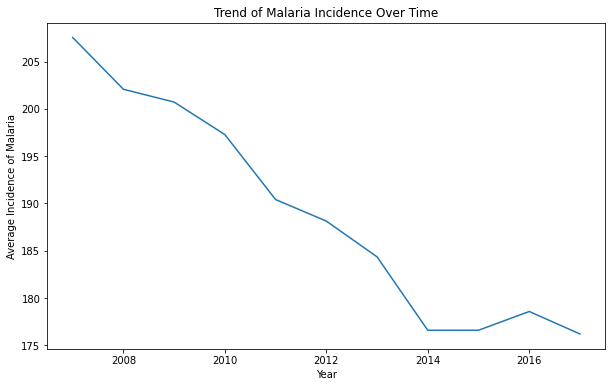

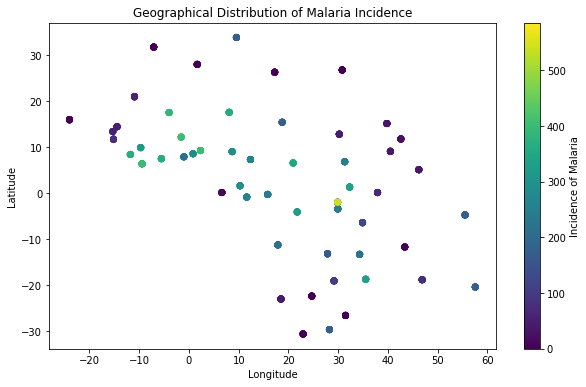

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Temporal Analysis
# Group the data by year and calculate the average incidence of malaria
yearly_incidence = df.groupby('Year')['Incidence of malaria (per 1,000 population at risk)'].mean()

# Plot the trend of malaria incidence over time
plt.figure(figsize=(10, 6))
plt.plot(yearly_incidence.index, yearly_incidence.values)
plt.xlabel('Year')
plt.ylabel('Average Incidence of Malaria')
plt.title('Trend of Malaria Incidence Over Time')
plt.show()

# Spatial Analysis
# Create a scatter plot to visualize the geographical distribution of malaria incidence
plt.figure(figsize=(10, 6))
plt.scatter(df['longitude'], df['latitude'], c=df['Incidence of malaria (per 1,000 population at risk)'], cmap='viridis')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Distribution of Malaria Incidence')
plt.colorbar(label='Incidence of Malaria')
plt.show()

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from mpl_toolkits.basemap import Basemap

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

## Spatial Analysis

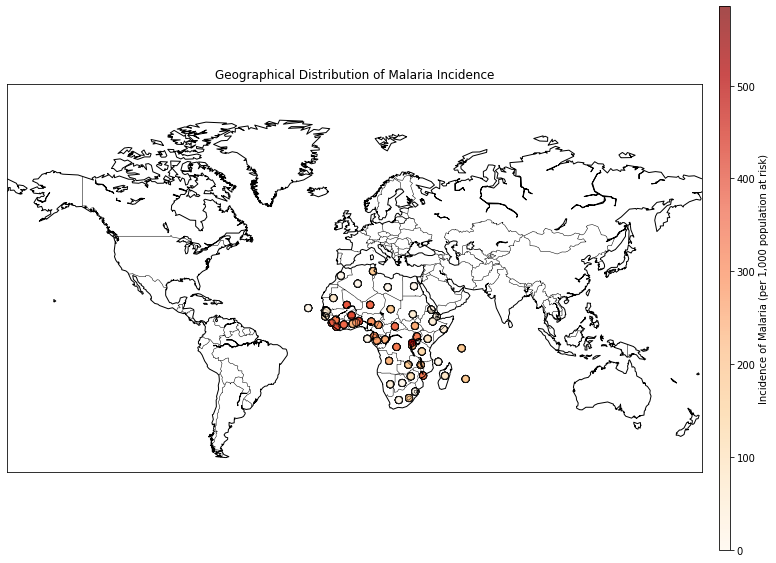

In [8]:
# Load the data into a GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude))

# Set the coordinate reference system to WGS84
gdf.crs = "EPSG:4326"

# Plotting malaria incidence on the world map using Basemap
fig, ax = plt.subplots(figsize=(15, 10))

# Create a Basemap instance
m = Basemap(projection='mill', llcrnrlat=-60, urcrnrlat=90, llcrnrlon=-180, urcrnrlon=180, resolution='c')

# Draw coastlines and country boundaries
m.drawcoastlines()
m.drawcountries()

# Convert latitude and longitude to map projection coordinates
x, y = m(gdf['longitude'].values, gdf['latitude'].values)

# Scatter plot of malaria incidence
sc = m.scatter(x, y, c=gdf['Incidence of malaria (per 1,000 population at risk)'], cmap='OrRd', s=50, edgecolor='k', alpha=0.7)

# Add color bar
cbar = plt.colorbar(sc, orientation='vertical', pad=0.02, aspect=50)
cbar.set_label('Incidence of Malaria (per 1,000 population at risk)')

# Add title
plt.title('Geographical Distribution of Malaria Incidence')
plt.show()

## Clustering Analysis

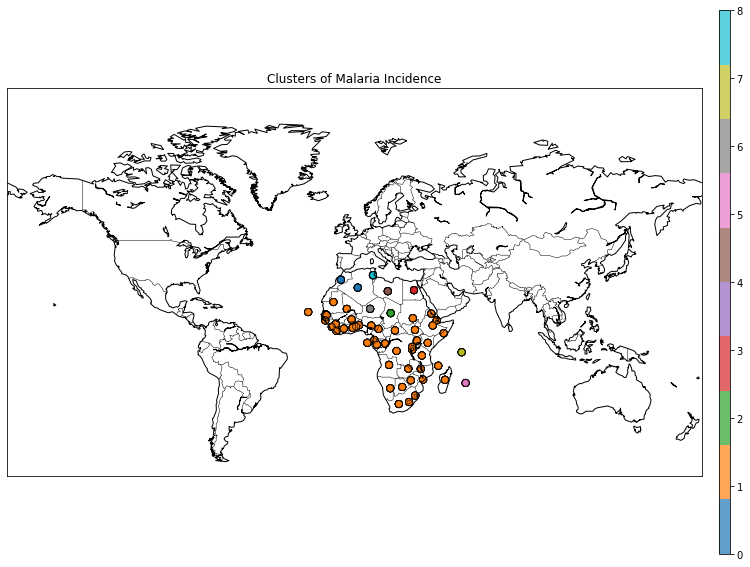

ModuleNotFoundError: No module named 'ace_tools'

In [9]:

import numpy as np
from sklearn.cluster import DBSCAN

# Extract relevant data for clustering
coords = gdf[['latitude', 'longitude']].values
incidence = gdf['Incidence of malaria (per 1,000 population at risk)'].values

# Standardize the data
coords_scaled = (coords - coords.mean(axis=0)) / coords.std(axis=0)

# Apply DBSCAN clustering
db = DBSCAN(eps=0.5, min_samples=10).fit(coords_scaled)
labels = db.labels_

# Add cluster labels to GeoDataFrame
gdf['Cluster'] = labels

# Plotting the clusters
fig, ax = plt.subplots(figsize=(15, 10))
m = Basemap(projection='mill', llcrnrlat=-60, urcrnrlat=90, llcrnrlon=-180, urcrnrlon=180, resolution='c')
m.drawcoastlines()
m.drawcountries()
x, y = m(gdf['longitude'].values, gdf['latitude'].values)
sc = m.scatter(x, y, c=gdf['Cluster'], cmap='tab10', s=50, edgecolor='k', alpha=0.7)
plt.title('Clusters of Malaria Incidence')
plt.colorbar(sc, orientation='vertical', pad=0.02, aspect=50)
plt.show()

# Display the GeoDataFrame with cluster labels
import ace_tools as tools; tools.display_dataframe_to_user(name="Malaria Incidence Clusters", dataframe=gdf)


## Predictive Model

In [10]:
# Selecting relevant features and target variable for modeling
features = ['Rural population (% of total population)', 'Rural population growth (annual %)',
            'Urban population (% of total population)', 'Urban population growth (annual %)',
            'People using at least basic drinking water services (% of population)',
            'People using at least basic drinking water services, rural (% of rural population)',
            'People using at least basic drinking water services, urban (% of urban population)',
            'People using at least basic sanitation services (% of population)',
            'People using at least basic sanitation services, rural (% of rural population)',
            'People using at least basic sanitation services, urban  (% of urban population)',
            'latitude', 'longitude']

# Drop rows with missing values in both features and target variable
data = df[features + ['Incidence of malaria (per 1,000 population at risk)']].dropna()

# Separate features and target variable
X = data[features]
y = data['Incidence of malaria (per 1,000 population at risk)']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and training the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

(1044.7853290929431, 0.952692332156144)

# Feature Importance

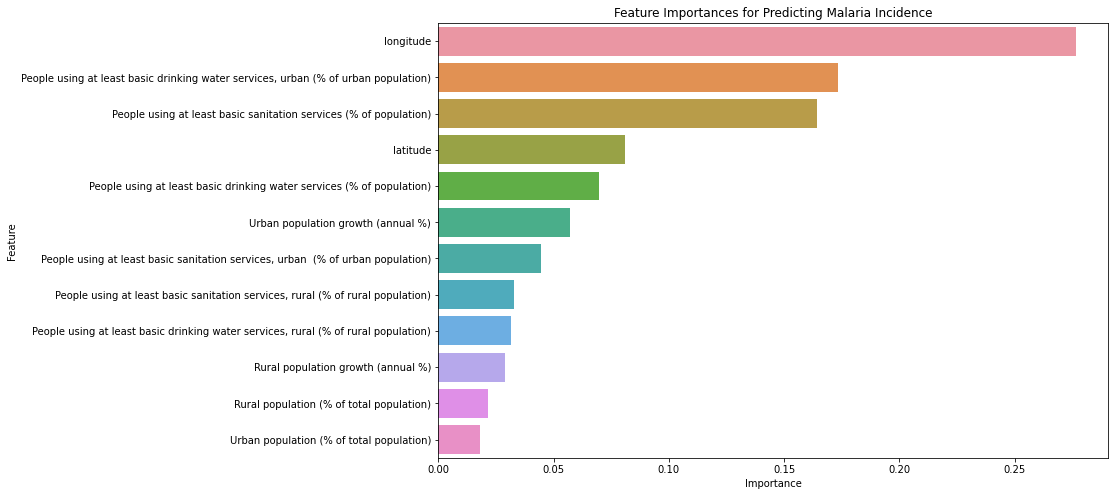

,Feature,Importance
11,longitude,0.276538
6,People using at least basic drinking water ser...,0.173415
7,People using at least basic sanitation service...,0.164446
10,latitude,0.080964
4,People using at least basic drinking water ser...,0.069653
3,Urban population growth (annual %),0.057034
9,People using at least basic sanitation service...,0.044615
8,People using at least basic sanitation service...,0.033086
5,People using at least basic drinking water ser...,0.031427
1,Rural population growth (annual %),0.029067


In [11]:

# Extract feature importances from the model
feature_importances = model.feature_importances_

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plotting feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances for Predicting Malaria Incidence')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

importance_df
